# Libraries

In [2]:
import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split

from sklearn.model_selection import cross_val_score
from sklearn.metrics import f1_score, precision_score, recall_score, accuracy_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import classification_report

from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.ensemble import AdaBoostClassifier
from sklearn.linear_model import SGDClassifier
from xgboost import XGBClassifier

from sklearn.preprocessing import LabelEncoder

from sklearn.model_selection import GridSearchCV

import matplotlib.pyplot as plt
import seaborn as sns

import time

# Import data

In [2]:
# Import Preprocessed data
data = pd.read_csv("../data/preprocess_data.csv")

# Import Bert Features
bert_features = pd.read_csv("../data/robertaFeatures.csv")
bert_features

,0,1,2,3,4,5,6,7,8,9,...,502,503,504,505,506,507,508,509,510,511
0,37.146960,-0.718577,-73.298584,-67.357710,-53.100407,21.316463,41.753353,32.956703,0.400308,-6.732258,...,-42.584038,-44.468742,-58.364820,53.291164,4.001782,54.231130,65.188090,84.791145,41.844980,53.529175
1,33.885796,13.979010,-85.719350,-30.451246,-22.090153,4.564034,31.165920,46.367527,-45.197884,-4.584962,...,-70.876810,-29.125689,-56.661724,68.347630,-14.737951,47.097120,39.724976,132.571990,53.459076,32.982380
2,16.787160,29.406092,-48.264774,-38.957745,-64.305210,38.198917,5.805443,29.524828,-17.051638,-50.592262,...,-86.319290,-12.413198,-68.498245,68.740620,15.706626,7.832871,24.119993,63.330020,-2.067029,37.960247
3,35.850006,42.962036,-75.509800,-48.785090,-41.254383,-1.976429,-6.982839,15.469737,-31.976854,-40.112244,...,-71.183754,-40.468624,-63.892910,65.396100,-26.214056,62.399140,22.835870,70.418625,57.963970,40.734090
4,29.469852,34.854473,-71.579410,-56.628280,-25.895311,10.295429,3.647528,6.661787,-56.010277,-16.745693,...,-95.782936,-47.623943,-66.134270,49.544070,-15.663713,82.616540,51.079155,34.097990,34.966217,50.609196
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3097,40.814007,52.365460,-66.301216,-5.888998,-25.481980,12.881906,-20.610170,29.777680,-70.850876,-23.516727,...,-95.068090,-3.134943,-21.826483,52.187405,4.000219,-8.243583,61.727478,65.101850,13.242323,-11.598402
3098,79.484070,14.683929,-55.400757,-36.410700,-51.086018,22.655785,23.772587,18.880114,-26.694736,-28.209026,...,-95.518690,-6.570502,-43.297688,36.865738,-26.593466,-11.854276,15.762242,30.530457,-21.491936,6.241181
3099,34.106094,46.009880,-107.840490,-21.282597,-41.868920,19.889317,27.115509,53.853207,-42.030037,-11.185226,...,-100.019050,-14.799921,-43.575123,80.095276,-46.723160,51.911724,5.770129,22.068426,4.152709,21.077639
3100,31.388390,6.374999,-67.875260,-34.819275,-34.774790,49.245262,7.877729,72.808310,-33.193504,-47.335880,...,-97.020836,-23.411839,-46.369392,119.432790,-8.986543,49.455700,-7.393787,114.400400,29.348710,32.622130


In [3]:
# Define X and y
X = bert_features
y = data['genre']

# Split data into Train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

# Classifiers

In [4]:
# Create a empty dataframe for results
finalEval = pd.DataFrame(columns=['Name', 'Accuracy', 'Precision', 'Recall', 'F1_score', 'Time_Taken'])

### Random Forest Classifier

In [5]:
# Create the parameter grid based on the results of random search 
param_grid_rfc = {
    'bootstrap': [True],
    'max_depth': [80, 90, 100, 110],
    'max_features': [2, 3],
    'min_samples_leaf': [3, 4, 5],
    'min_samples_split': [8, 10, 12],
    'n_estimators': [100, 200, 300, 1000]
}

# Create a base model
rf = RandomForestClassifier()

# Instantiate the grid search model
gridSearchRF = GridSearchCV(estimator = rf,
                           param_grid = param_grid_rfc, 
                           cv = 3,
                           n_jobs = -1,
                           verbose = 2)

# start time
begin = time.time()

# Fit the grid search to the data
gridSearchRF.fit(X_train, y_train)

# Best parameters from the grid
print(gridSearchRF.best_params_)

# Best Grid Model
bestGridModelRF = gridSearchRF.best_estimator_

# Predict the response for test dataset
y_pred_RF = bestGridModelRF.predict(X_test)

# end time
end = time.time()

# time taken
timeTakenRF = end-begin

Fitting 3 folds for each of 288 candidates, totalling 864 fits
{'bootstrap': True, 'max_depth': 90, 'max_features': 3, 'min_samples_leaf': 3, 'min_samples_split': 8, 'n_estimators': 1000}


In [6]:
# Print Classification Report
print(classification_report(y_test, y_pred_RF))

              precision    recall  f1-score   support

       crime       0.88      0.07      0.12       106
     fantasy       0.62      0.81      0.70       193
     history       0.73      0.66      0.69       139
      horror       0.97      0.22      0.36       140
     science       0.81      0.64      0.72       142
    thriller       0.48      0.91      0.63       211

    accuracy                           0.61       931
   macro avg       0.75      0.55      0.54       931
weighted avg       0.72      0.61      0.57       931



In [7]:
# Create empty metrics list
metricsListRF = []

# Insert results to the metrics list
metricsListRF.append('Random Forest')
metricsListRF.append(accuracy_score(y_pred_RF, y_test))
metricsListRF.append(precision_score(y_pred_RF, y_test, average = 'macro'))
metricsListRF.append(recall_score(y_pred_RF, y_test, average = 'macro'))
metricsListRF.append(f1_score(y_pred_RF, y_test, average = 'macro'))
metricsListRF.append(timeTakenRF)

# Append the results to the dataframe
finalEval.loc[len(finalEval)] = metricsListRF

### MLP Classifier

In [8]:
param_grid_mlp = {
    'hidden_layer_sizes': [(50,50,50), (50,100,50), (100,)],
    'activation': ['tanh', 'relu'],
    'solver': ['sgd', 'adam'],
    'alpha': [0.0001, 0.05],
    'learning_rate': ['constant','adaptive'],
}

# Create the base model
mlpc = MLPClassifier(random_state=1, max_iter=300)

# Grid Search
gridSearchMLP = GridSearchCV(estimator = mlpc,
                             param_grid = param_grid_mlp,
                             n_jobs=-1,
                             cv=5)

# start time
begin = time.time()

# Fit the grid search to the data
gridSearchMLP.fit(X_train, y_train)

# Best parameters from the grid
print(gridSearchMLP.best_params_)

# Best Grid Model
bestGridModelMLP = gridSearchMLP.best_estimator_

# Predict the response for test dataset
y_pred_MLP = bestGridModelMLP.predict(X_test)

# end time
end = time.time()

# time taken
timeTakenMLP = end-begin

{'activation': 'tanh', 'alpha': 0.05, 'hidden_layer_sizes': (100,), 'learning_rate': 'adaptive', 'solver': 'sgd'}


c:\users\anand\appdata\local\programs\python\python39\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


In [9]:
# Print Classification Report
print(classification_report(y_test, y_pred_MLP))

              precision    recall  f1-score   support

       crime       0.57      0.42      0.49       106
     fantasy       0.69      0.71      0.70       193
     history       0.67      0.76      0.71       139
      horror       0.72      0.63      0.67       140
     science       0.74      0.74      0.74       142
    thriller       0.65      0.72      0.68       211

    accuracy                           0.68       931
   macro avg       0.67      0.66      0.66       931
weighted avg       0.68      0.68      0.67       931



In [10]:
# Create empty metrics list
metricsListMLP = []

# Insert results to the metrics list
metricsListMLP.append('MLP Classifier')
metricsListMLP.append(accuracy_score(y_pred_MLP, y_test))
metricsListMLP.append(precision_score(y_pred_MLP, y_test, average = 'macro'))
metricsListMLP.append(recall_score(y_pred_MLP, y_test, average = 'macro'))
metricsListMLP.append(f1_score(y_pred_MLP, y_test, average = 'macro'))
metricsListMLP.append(timeTakenMLP)

# Append the results to the dataframe
finalEval.loc[len(finalEval)] = metricsListMLP

### Support Vector Classifier

In [11]:
# defining parameter range
param_grid_svc = {'C': [0.1, 1, 10, 100, 1000],
                  'kernel': ['linear', 'rbf', 'poly'],
                  'gamma': ['auto','scale']}

# Create sv classifer object
svc = SVC()
  
gridSearchSVC = GridSearchCV(estimator = svc,
                    param_grid = param_grid_svc,
                    refit = True,
                    cv = 10)

# start time
begin = time.time()

# Fit the grid search to the data
gridSearchSVC.fit(X_train, y_train)

# Best parameters from the grid
print(gridSearchSVC.best_params_)

# Best Grid Model
bestGridModelSVC = gridSearchSVC.best_estimator_

# Predict the response for test dataset
y_pred_SVC = bestGridModelSVC.predict(X_test)

# end time
end = time.time()

# time taken
timeTakenSVC = end-begin

{'C': 1, 'gamma': 'scale', 'kernel': 'poly'}


In [12]:
# Print Classification Report
print(classification_report(y_test, y_pred_SVC))

              precision    recall  f1-score   support

       crime       0.66      0.43      0.52       106
     fantasy       0.71      0.77      0.74       193
     history       0.71      0.79      0.75       139
      horror       0.75      0.56      0.64       140
     science       0.78      0.73      0.75       142
    thriller       0.63      0.78      0.70       211

    accuracy                           0.70       931
   macro avg       0.71      0.68      0.68       931
weighted avg       0.70      0.70      0.69       931



In [13]:
# Create empty metrics list
metricsListSVC = []

# Insert results to the metrics list
metricsListSVC.append('Support Vector')
metricsListSVC.append(accuracy_score(y_pred_SVC, y_test))
metricsListSVC.append(precision_score(y_pred_SVC, y_test, average = 'macro'))
metricsListSVC.append(recall_score(y_pred_SVC, y_test, average = 'macro'))
metricsListSVC.append(f1_score(y_pred_SVC, y_test, average = 'macro'))
metricsListSVC.append(timeTakenSVC)

# Append the results to the dataframe
finalEval.loc[len(finalEval)] = metricsListSVC

### Adaboost Classifier

In [14]:
# Create svc object
svc = SVC(probability=True, kernel='rbf')

# Create adaboost classifer object
abc = AdaBoostClassifier(n_estimators=100, base_estimator= svc, learning_rate= 0.01)

# start time
begin = time.time()

# Train Adaboost Classifer
modelABC = abc.fit(X_train, y_train)

#Predict the response for test dataset
y_pred_abc = modelABC.predict(X_test)

# end time
end = time.time()

# time taken
timeTakenABC = end-begin

In [15]:
# Print Classification Report
print(classification_report(y_test, y_pred_abc))

              precision    recall  f1-score   support

       crime       0.50      0.57      0.53       106
     fantasy       0.79      0.68      0.73       193
     history       0.71      0.75      0.73       139
      horror       0.66      0.64      0.65       140
     science       0.76      0.77      0.77       142
    thriller       0.66      0.68      0.67       211

    accuracy                           0.69       931
   macro avg       0.68      0.68      0.68       931
weighted avg       0.69      0.69      0.69       931



In [16]:
# Create empty metrics list
metricsListABC = []

# Insert results to the metrics list
metricsListABC.append('Adaboost')
metricsListABC.append(accuracy_score(y_pred_abc, y_test))
metricsListABC.append(precision_score(y_pred_abc, y_test, average = 'macro'))
metricsListABC.append(recall_score(y_pred_abc, y_test, average = 'macro'))
metricsListABC.append(f1_score(y_pred_abc, y_test, average = 'macro'))
metricsListABC.append(timeTakenABC)

# Append the results to the dataframe
finalEval.loc[len(finalEval)] = metricsListABC

### SGD Classifier

In [17]:
# Create sgd classifier object
sgdc = SGDClassifier(max_iter=1000, tol=0.01) 

# start time
begin = time.time()

# Train SGD Classifier
modelSGD = sgdc.fit(X_train, y_train)

#Predict the response for test dataset
y_pred_sgd = modelSGD.predict(X_test)

# end time
end = time.time()

# time taken
timeTakenSGD = end-begin

In [18]:
# Print Classification Report
print(classification_report(y_test, y_pred_sgd))

              precision    recall  f1-score   support

       crime       0.35      0.89      0.50       106
     fantasy       0.64      0.68      0.66       193
     history       0.59      0.83      0.69       139
      horror       0.79      0.44      0.57       140
     science       0.75      0.61      0.67       142
    thriller       0.88      0.28      0.42       211

    accuracy                           0.59       931
   macro avg       0.67      0.62      0.59       931
weighted avg       0.69      0.59      0.58       931



In [19]:
# Create empty metrics list
metricsListSGD = []

# Insert results to the metrics list
metricsListSGD.append('SGD Classifier')
metricsListSGD.append(accuracy_score(y_pred_sgd, y_test))
metricsListSGD.append(precision_score(y_pred_sgd, y_test, average = 'macro'))
metricsListSGD.append(recall_score(y_pred_sgd, y_test, average = 'macro'))
metricsListSGD.append(f1_score(y_pred_sgd, y_test, average = 'macro'))
metricsListSGD.append(timeTakenABC)

# Append the results to the dataframe
finalEval.loc[len(finalEval)] = metricsListSGD

### XGBoost Classifier

In [20]:
# create label encoder for XG Boost
le = LabelEncoder()
y_train_le = le.fit_transform(y_train)
y_test_le = le.fit_transform(y_test)


# defining parameter range
param_grid_xgb = {
    "colsample_bytree": [0.1, 0.3, 0.5],
    "learning_rate": [0.1, 0.3, 0.5],
    "max_depth": [7, 9]
}

# Create xgb classifer object
xgbc = XGBClassifier()
  
gridSearchXGB = GridSearchCV(estimator=xgbc,
                             param_grid=param_grid_xgb,
                             refit =True,
                             cv=5,
                             n_jobs=1,
                             return_train_score=True)

# start time
begin = time.time()

# Fit the grid search to the data
gridSearchXGB.fit(X_train, y_train_le)

# Best parameters from the grid
print(gridSearchXGB.best_params_)

# Best Grid Model
bestGridModelXGB = gridSearchXGB.best_estimator_

# Predict the response for test dataset
y_pred_XGB = bestGridModelXGB.predict(X_test)

# end time
end = time.time()

# time taken
timeTakenXGB = end-begin

{'colsample_bytree': 0.1, 'learning_rate': 0.3, 'max_depth': 9}


In [21]:
# Print Classification Report
print(classification_report(y_test_le, y_pred_XGB))

              precision    recall  f1-score   support

           0       0.65      0.47      0.55       106
           1       0.67      0.77      0.71       193
           2       0.72      0.76      0.74       139
           3       0.78      0.57      0.66       140
           4       0.80      0.68      0.74       142
           5       0.65      0.81      0.72       211

    accuracy                           0.70       931
   macro avg       0.71      0.68      0.69       931
weighted avg       0.71      0.70      0.70       931



In [46]:
"""
Here the genres are LABEL ENCODED.

Genre    Class
crime    0
fantasy  1
history  2
horror   3
science  4
thriller 5
"""

'\nHere the genres are LABEL ENCODED.\n\nGenre    Class\ncrime    0\nfantasy  1\nhistory  2\nhorror   3\nscience  4\nthriller 5\n'

In [22]:
# Create empty metrics list
metricsListXGB = []

# Insert results to the metrics list
metricsListXGB.append('XG Boost')
metricsListXGB.append(accuracy_score(y_pred_XGB, y_test_le))
metricsListXGB.append(precision_score(y_pred_XGB, y_test_le, average = 'macro'))
metricsListXGB.append(recall_score(y_pred_XGB, y_test_le, average = 'macro'))
metricsListXGB.append(f1_score(y_pred_XGB, y_test_le, average = 'macro'))
metricsListXGB.append(timeTakenXGB)

# Append the results to the dataframe
finalEval.loc[len(finalEval)] = metricsListXGB

## Export final Result

In [24]:
# Export data
finalEval.to_csv( "../data/finalEvaluation.csv", index=False, encoding='utf-8-sig')

## Comparison of all Classifiers

In [25]:
# Print all classifier results
print(finalEval)

             Name  Accuracy  Precision    Recall  F1_score  Time_Taken
0   Random Forest  0.611171   0.551404  0.747589  0.537213  232.093345
1  MLP Classifier  0.677766   0.662236  0.673444  0.664827  363.983815
2  Support Vector  0.699248   0.676973  0.707085  0.683835  167.606161
3        Adaboost  0.685285   0.681371  0.679534  0.679333  592.513233
4  SGD Classifier  0.589689   0.622539  0.667618  0.586712  592.513233
5        XG Boost  0.699248   0.676555  0.712248  0.686355  541.909317


<AxesSubplot:xlabel='Name', ylabel='Accuracy'>

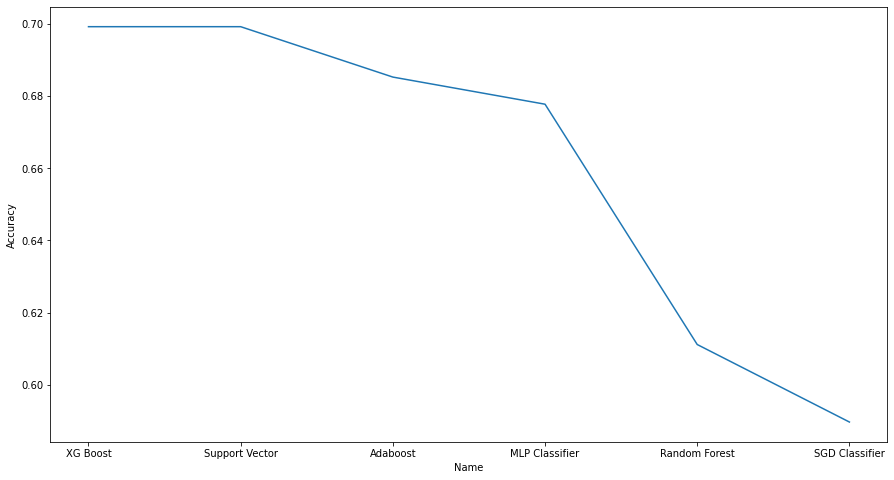

In [41]:
# Sort data by Accuracy
finalEval.sort_values(by = 'Accuracy', ascending = False, inplace = True)

# Plot data
plt.figure(figsize=(15,8))
sns.lineplot(data=finalEval, x="Name", y="Accuracy")

<AxesSubplot:xlabel='Name', ylabel='Time_Taken'>

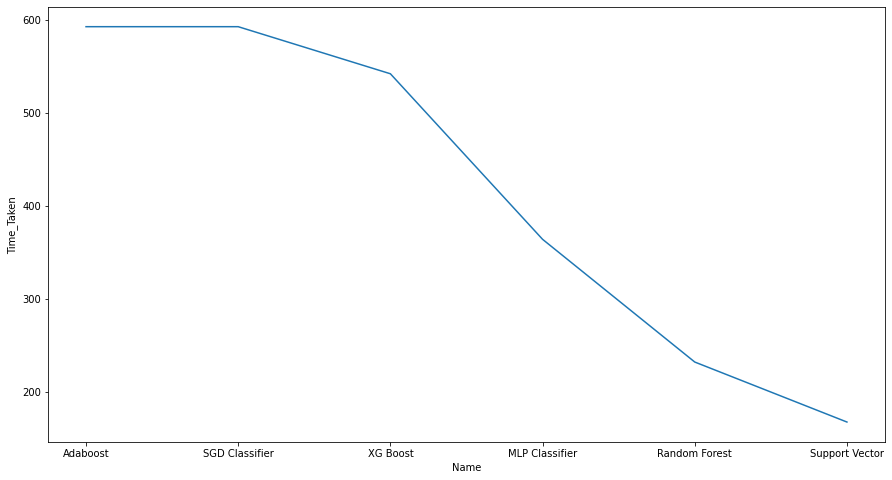

In [42]:
# Sort data by time taken
finalEval.sort_values(by = 'Time_Taken', ascending = False, inplace = True)

# Plot data
plt.figure(figsize=(15,8))
sns.lineplot(data=finalEval, x="Name", y="Time_Taken")

## Confusion Matrix for our best classifier

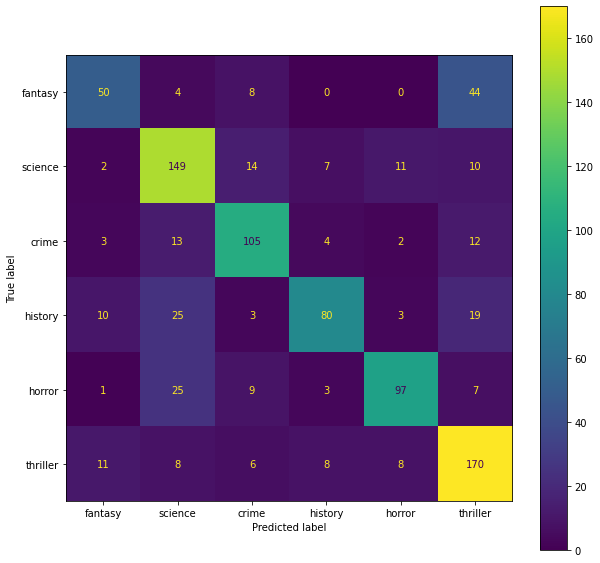

In [47]:
plt.figure(figsize=(10,10))
ax= plt.subplot()
cm = confusion_matrix(y_test_le, y_pred_XGB)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=data.genre.unique())
disp.plot(ax=ax)

We observe here that the model fairly perfoms well. Except many fantasy genre being classified as thriller, the performance of the model seems well.

## Investigation

In [4]:
# Import pre-processed data
preprocessed_data = pd.read_csv("../data/preprocess_data.csv")

In [6]:
# Create corpus for fantasy genre
fantasyDF = preprocessed_data[preprocessed_data.genre == 'fantasy']
corpusFantasy = ' '.join(' '.join(fantasyDF.title_summary.to_list()).split(' '))

# Create corpus for thriller genre
thrillerDF = preprocessed_data[preprocessed_data.genre == 'thriller']
corpusThriller = ' '.join(' '.join(thrillerDF.title_summary.to_list()).split(' '))

In [7]:
from wordcloud import WordCloud

# Create word clouds
word_cloud_fantasy = WordCloud(collocations = False, background_color='white').generate(corpusFantasy)
word_cloud_thriller = WordCloud(collocations = False, background_color='white').generate(corpusThriller)

<function matplotlib.pyplot.show(close=None, block=None)>

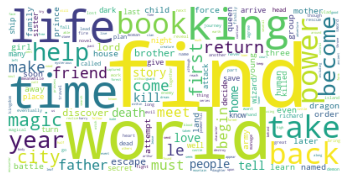

In [8]:
# Show Fantasy word cloud
plt.imshow(word_cloud_fantasy)
plt.axis('off')
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

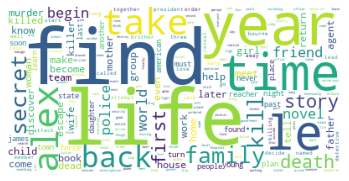

In [10]:
# Show Thriller word cloud
plt.imshow(word_cloud_thriller)
plt.axis('off')
plt.show

We observe here that both the genres are very closely related as we see from the word clouds as well that the most common words like `find, life, time, world` are also common. Thus, the misclassification between these two genres are in vast. 

# Conclusion

From the final evaluation dataframe we can notice that both XG Boost Classifier and support vector classifier gives the best accuracy of 69.9%. While other classifier such as MLP and Adaboost are also very close with around 68% of accuracy.

It is also our point of interest that though both SVC and XG Boost give us the best and same accuracy, but XGB consumes almost thrice the time as SVC.

So, I would conclude that based on above observation, SVC in this case is the most efficient classifier.